In [1]:
using Turing, Random, AdvancedVI, DelimitedFiles, DataFrames
using Plots
Random.seed!(0);

In [2]:
#Generate data
T = 400

vz, vy = 0.01, 0.1

z_data_0 = 0
z_data = [sin(pi/60) + sqrt(vz)*randn()]
x_data_0 = 0
x_data = [x_data_0 + sqrt(exp(z_data[1]))*randn()]
y_data = [x_data[1]+sqrt(vy)*randn()]
for t=2:T
    append!(z_data, sin(t*pi/60) + sqrt(vz)*randn())
    append!(x_data, x_data[end] + sqrt(exp(z_data[end]))*randn())
    append!(y_data, x_data[end]+sqrt(vy)*randn())
end

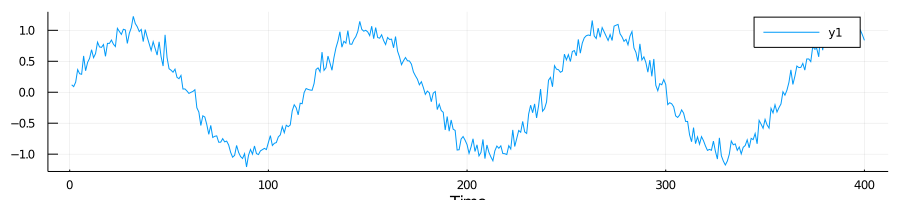

In [3]:
plot(z_data, xlabel="Time", size=(900,200))

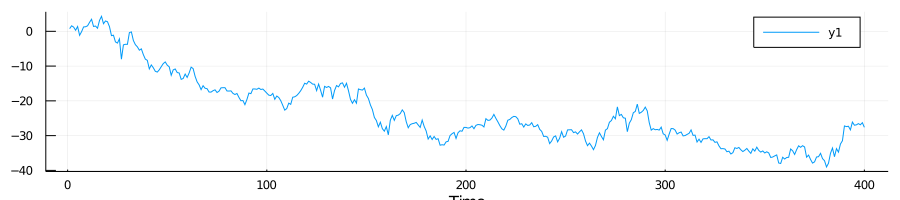

In [4]:
plot(y_data, xlabel="Time", size=(900,200))

In [5]:
@model function HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_t)
    model_vz, model_vy = 0.1, 0.1
    z_t_min ~ Normal(m_z_t_min, sqrt(v_z_t_min))
    z_t ~ Normal(z_t_min, sqrt(model_vz))
    x_t_min ~ Normal(m_x_t_min, sqrt(v_x_t_min))
    x_t ~ Normal(x_t_min, sqrt(exp(z_t)))
    y_t ~ Normal(x_t, sqrt(model_vy))
end

HGF (generic function with 1 method)

In [6]:
# Define values for prior statistics
m_z_0, v_z_0 = 0.0, 1.0
m_x_0, v_x_0 = 0.0, 1.0

m_z_t_min, v_z_t_min = m_z_0, v_z_0
m_x_t_min, v_x_t_min = m_x_0, v_x_0

advi = ADVI(10, 4000)

m_z = Vector{Float64}(undef, T)
v_z = Vector{Float64}(undef, T)
m_x = Vector{Float64}(undef, T)
v_x = Vector{Float64}(undef, T)

total_time = 0.0

for t=1:T
    model = HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_data[t])
    etime = @elapsed q = vi(model, advi);
    total_time += etime
    samples = rand(q,1000)
    m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min = mean(samples[2,:]), var(samples[2,:]), mean(samples[4,:]), var(samples[4,:])
    m_z[t], v_z[t], m_x[t], v_x[t] = m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min
end

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12372887859141813382
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
[ADVI] Optimizing...100% Time: 0:00:03
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5573648639931275908
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 994175836993497317
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16029693481183730319
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17662227049733552014
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5375319188918025781
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8604985812650258214
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7287637415671857316
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13828211508153938410
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 18068636563007724587
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 980929355280457607
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15201550416836919954
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8323024797968342877
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 283895648380315594
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2702858953783700312
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer 

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10562256303711452010
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 6642022418242202829
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12039087457526435898
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4869149159908533142
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3747868019805564791
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13759201818543425461
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17337927488570924411
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5487609390726290029
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2622538364049269363
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10320149328346188612
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimi

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4157605196313892892
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14101761744096174373
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10442757422513821667
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3154830296431092005
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8584751298989594160
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10895981449979746003
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12579781911422180893
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16351453137622083983
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5785664694226855245
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9781378429320432586
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimi

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 18029257286871715714
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2905363824979751543
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12676012657023773350
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16211834776091055349
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10650606349235172258
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optim

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1063801670064232836
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9691067741696592195
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14997980692174575222
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16002608858536705963
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4097748511152789131
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimiz

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4248109880772593332
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16104597789632847416
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14232699944243635132
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 9564949157935067553
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 635571519624435401
└ @ AdvancedVI /Users/sakbayrak/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199


In [7]:
total_time

124.64522747100008

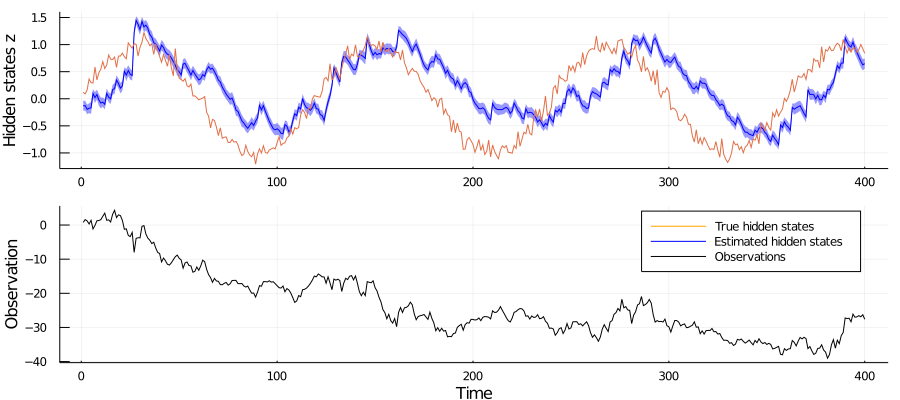

In [8]:
gr()
l = @layout [a ; b]

p1 = plot(m_z, ribbon=v_z, fillalpha=0.4, lw=1, color=:blue, label="Estimated hidden states",legend=false, yaxis="Hidden states z")
plot!(z_data,lw=1,label="True hidden states")

p2 = plot([fill(NaN, T) fill(NaN, T) y_data], lw=1, color=[:orange :blue :black], label=["True hidden states" "Estimated hidden states" "Observations"], legend=:topright, xaxis="Time", yaxis="Observation", link=:x)

p = plot(p1, p2, layout = l, size = (900, 400))

In [9]:
writedlm("ADVImeanestimates.txt", m_z)
writedlm("ADVIvarestimates.txt", v_z)